In [1]:
import matplotlib.pyplot as plt
import numpy as np

This code was created by Guilherme Vieira (@guilhermewells/sechat.blog for the youtube channel https://www.youtube.com/user/guilhermewellsful), please don't remove this message.

In [2]:
class Rule:
    """These are the following rules for elementary celular automata and totalistic cellular automata. Each method tells 
    about one of them"""
    
    def __init__(self,value):
        self.value = value
        self.Ca = [0 for i in range(2*size+2)]                     #creating the first line for each iteration
                                                                    #the middle term is set to be 1

    def Regra1(self):                                          #elementary cellular automata           
        self.Ca[int((2*size+2)/2)] = 1         
        Canew = [0]

        a = '{0:b}'.format(self.value)                           #transforming into binary
        x = a.rjust(8,'0')                                       #keeping fixed the number of digits
        comb = {'111':x[0],'110':x[1],'101':x[2],'100':x[3],'011':x[4],'010':x[5],'001':x[6],'000':x[7]}   #a dictionary for the rules
        for i in range(1,(2*size+2)-1):
            y = str(self.Ca[i-1]) + str(self.Ca[i]) + str(self.Ca[i+1])     #here we apply the rules according to 'comb'
            Canew.append(comb[y])
        Canew.append(0)
        self.Ca = Canew


    def Regra2(self):                                           #totallistic cellular automata
        
        self.Ca[int((2*size+2)/2)] = 2 
        
        Canew = [0]

        b = int(self.value)
        def find_ternary(b):                                     #transforming into ternary https://www.codevscolor.com/python-convert-decimal-ternarybase-3/
            quotient = b/3    
            remainder = b%3
            if quotient == 0:   
                return ""
            else:
                return find_ternary(int(quotient)) + str(int(remainder))    
        
        x = find_ternary(b).rjust(7,'0')
        comb = {'6':x[0],'5':x[1],'4':x[2],'3':x[3],'2':x[4],'1':x[5],'0':x[6]}              #a dictionary for the rules
        for i in range(1,(2*size+2)-1):
            y = str(int(self.Ca[i-1]) + int(self.Ca[i]) + int(self.Ca[i+1]))     #here we apply the rules according to 'comb'
            Canew.append(comb[y])
        Canew.append(0)
        self.Ca = Canew

        

What is the size of the grid? 100
Modo 1(ECA) or Modo 2(TCA)? Modo2
Diga uma regra de automata totalista, de 0 a 6561: 2372


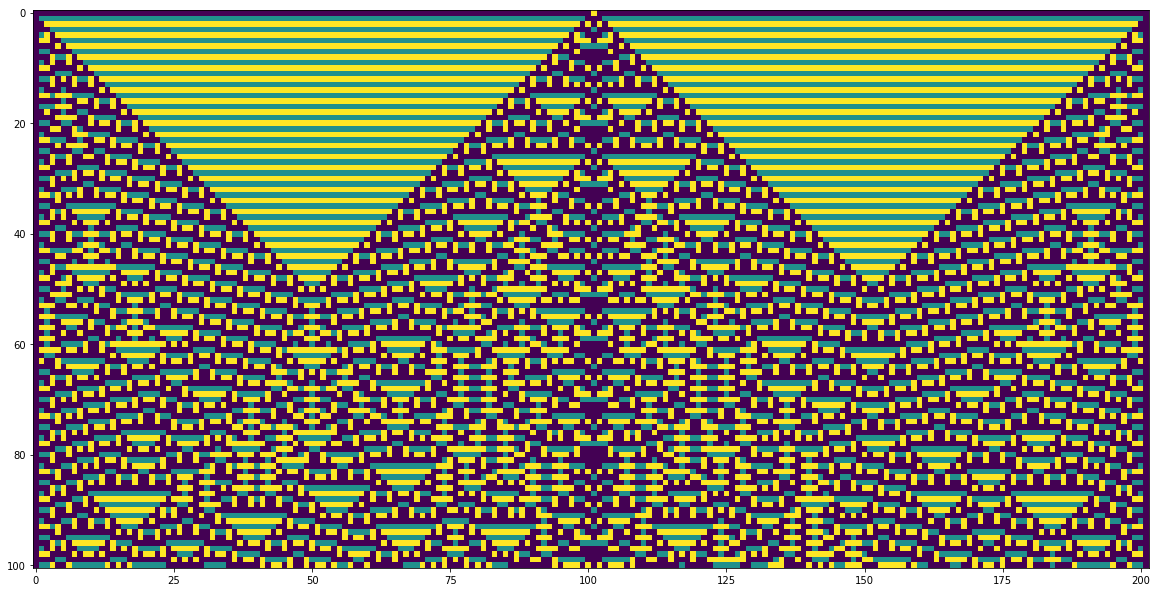

In [15]:
size = int(input('What is the size of the grid? '))
#We will get the final size, or a time step, then choose the elementary cellular automaton(Modo1) 
#or the totallistic cellular automaton (Modo2)
regra = input('Modo 1(ECA) or Modo 2(TCA)? ')

if regra == 'Modo1':
    rules = Rule(int(input('Diga uma regra de automata, de 0 a 256: ')))
elif regra == 'Modo2':
    rules = Rule(int(input('Diga uma regra de automata totalista, de 0 a 6561: ')))
    
#the 'rules' set the entrance rule for nearest neighborhoods for each case(Modo), the loop bellow makes the updates into a matrix
#for the chosee Rule and "Modo"

for j in range(size):
    if j == 0:
        A = [rules.Ca]
    if regra == 'Modo1':
        rules.Regra1()
    elif regra == 'Modo2':
        rules.Regra2()    
    A = np.insert(A,[j+1],[rules.Ca], axis=0)
#    A = np.vstack((A,rules.Ca)).astype(float)  just another way of including the terms

fig, ax = plt.subplots(1,1,figsize=(20, 20))
ax.imshow(A, interpolation='nearest')
#fig.save('folder/it' + str(j) + '.png')
